## Importing libraries and balanced dataset

In [1]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
df = pd.read_csv('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')
X = pd.read_csv('IABAC_Proj.csv')
y = pd.read_csv('IABAC_Proj1.csv')

In [4]:
X.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,1,2,2,5,13,2,10,3,4,...,12,4,10,2,2,10,7,0,8,0
1,47,1,2,2,5,13,2,14,4,4,...,12,4,20,2,3,7,7,1,7,0
2,40,1,1,1,5,13,1,5,4,4,...,21,3,20,2,3,18,13,1,12,0
3,60,1,2,2,5,13,2,16,4,1,...,14,4,10,1,3,2,2,2,2,0
4,27,1,1,0,1,3,1,10,2,4,...,21,3,9,4,2,9,7,1,7,0


In [5]:
y.head()

,PerformanceRating
0,3
1,3
2,4
3,3
4,4


# Appling Feature selection 
## SelectKbest

In [6]:
bestFeatures = SelectKBest(score_func=chi2,k=15)
fit = bestFeatures.fit(X,y)

In [7]:
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)

In [8]:
featureScores =pd.concat([columns,scores],axis=1)
featureScores.columns = ['specs','score']

In [17]:
featureScores

,specs,score
0,Age,3.591666
1,Gender,29.240033
2,EducationBackground,35.092866
3,MaritalStatus,27.636440
4,EmpDepartment,154.709459
5,EmpJobRole,192.230960
6,BusinessTravelFrequency,35.376332
7,DistanceFromHome,146.558079
8,EmpEducationLevel,25.848249
9,EmpEnvironmentSatisfaction,496.619388


## ExtraTreeClassifier

In [18]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [20]:
print(model.feature_importances_)

[0.02076934 0.01726068 0.01975314 0.02288861 0.04815324 0.03016456
 0.02605293 0.02144047 0.02181185 0.1914207  0.02299665 0.02125216
 0.0175109  0.0213991  0.01941775 0.03403278 0.19298167 0.02374239
 0.01858647 0.02142236 0.03097582 0.0243135  0.0359346  0.06166293
 0.02333988 0.01071551]


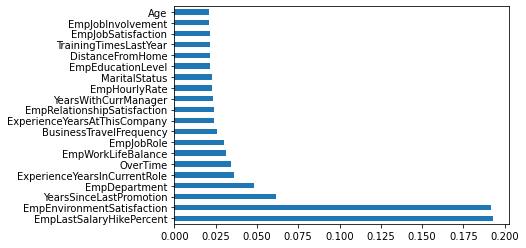

In [27]:
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Correlation matrix

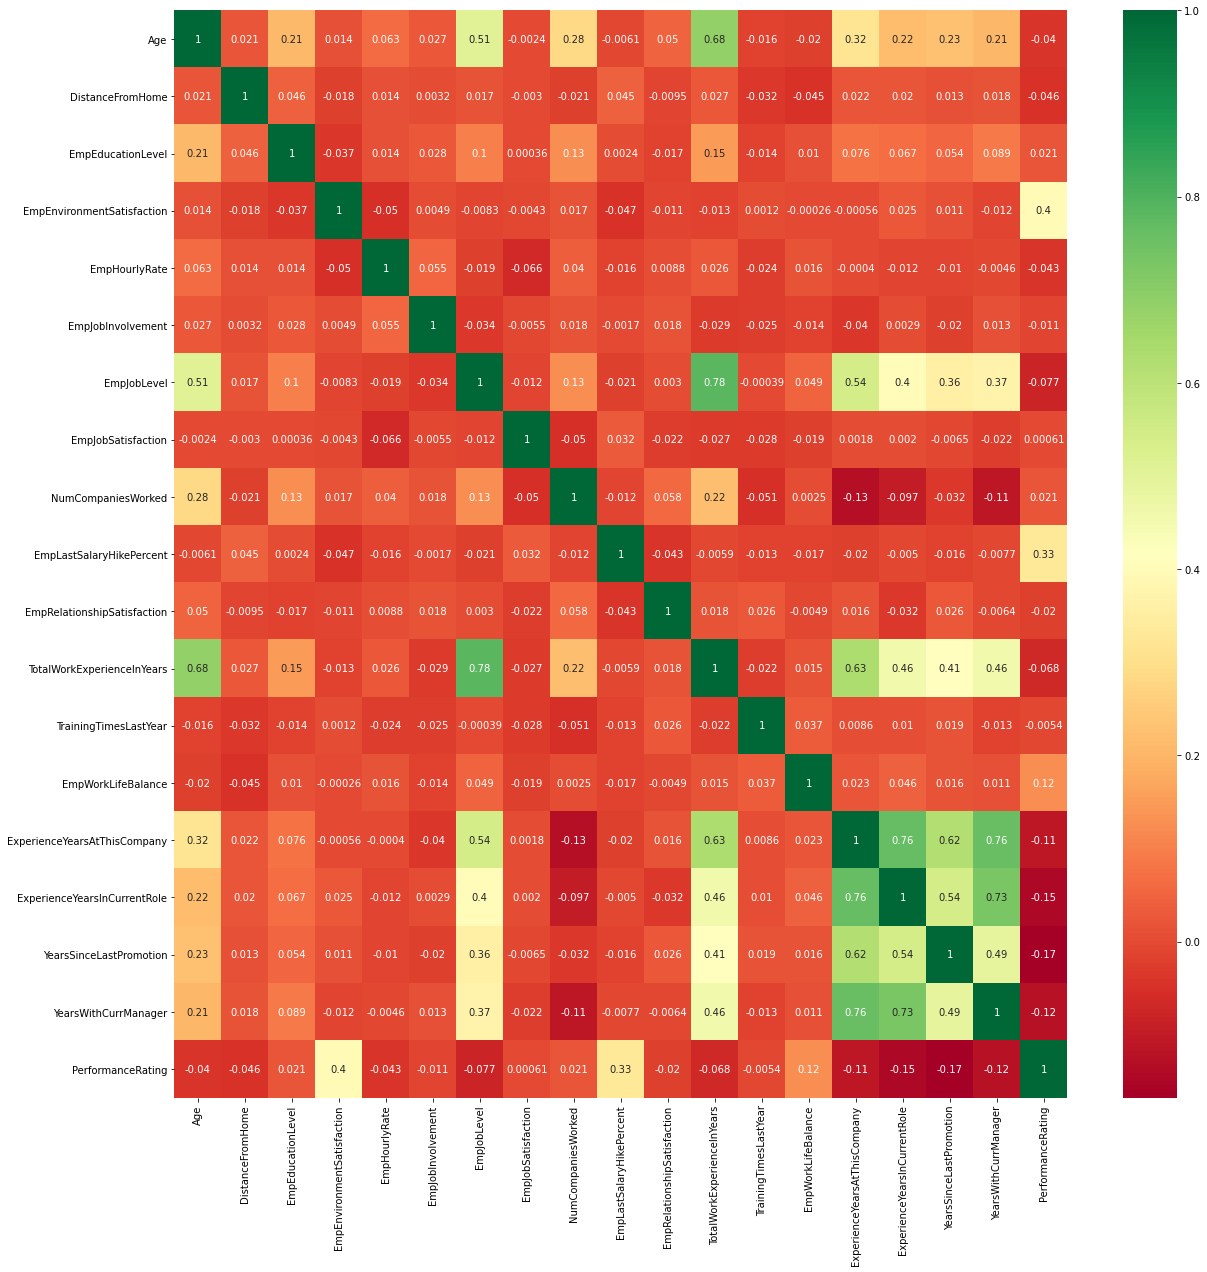

In [26]:
cormat = df.corr()
top_corr_features = cormat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

# Dropping the most irrelevant columns

In [9]:
X1 = X.drop(['Age','EmpHourlyRate'],axis=1,inplace=True)

In [10]:
y

,PerformanceRating
0,3
1,3
2,4
3,3
4,4
...,...
2488,4
2489,4
2490,4
2491,4


In [11]:
X

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpJobInvolvement,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,2,2,5,13,2,10,3,4,3,...,12,4,10,2,2,10,7,0,8,0
1,1,2,2,5,13,2,14,4,4,3,...,12,4,20,2,3,7,7,1,7,0
2,1,1,1,5,13,1,5,4,4,2,...,21,3,20,2,3,18,13,1,12,0
3,1,2,2,5,13,2,16,4,1,3,...,14,4,10,1,3,2,2,2,2,0
4,1,1,0,1,3,1,10,2,4,3,...,21,3,9,4,2,9,7,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,1,2,1,1,3,0,21,2,3,3,...,20,1,8,1,3,3,2,0,2,0
2489,1,2,2,5,13,1,5,3,2,2,...,13,3,9,3,3,6,4,0,4,0
2490,0,2,1,1,3,2,4,2,3,2,...,20,4,5,2,2,4,1,1,3,0
2491,1,2,1,4,12,1,5,4,2,3,...,15,3,9,2,3,6,3,1,4,0


# Appling Machine learning Algorithms
## Decision Tree ,Random Forest ,XGBoost,K Nearest neighbours,SVM Classifiers
### Finding Accuracy ,classification report and confusion matrix

In [12]:
def ml_algorthims(X,y):
    fig, axes = plt.subplots(3,2, figsize=(10,10))
    print("::::::::::::::::::: Splitting the dataset into train and test ::::::::::")
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    print(" :::::::::::::::Decision Tree Classifier::::::::::::: ")
    dtree = DecisionTreeClassifier().fit(x_train,y_train)
    dtree_pred = dtree.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test,dtree_pred),annot=True, fmt='d', ax=axes[0,0])
    ax.set_title("Decision Tree Confusion Matrix")
    print(classification_report(dtree_pred,y_test))
    print(f'Accuracy : {accuracy_score(y_test,dtree_pred):0.2f}')
    print()
    print(" :::::::::::::::Random Forest Classifier::::::::::::: ")
    rftree = RandomForestClassifier().fit(x_train,y_train)
    rftree_pred = rftree.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test,rftree_pred),annot=True, fmt='d', ax=axes[0,1])
    ax.set_title("Random Forest Confusion Matrix")
    print(classification_report(rftree_pred,y_test))
    print(f'Accuracy : {accuracy_score(y_test,rftree_pred):0.2f}')
    print()
    print(" :::::::::::::::Xgboost::::::::::::: ")
    xgb_model = XGBClassifier().fit(x_train,y_train)
    xgb_model_pred = xgb_model.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test,xgb_model_pred),annot=True, fmt='d', ax=axes[1,0])
    ax.set_title("Xgb Confusion Matrix")
    print(classification_report(xgb_model_pred,y_test))
    print(f'Accuracy : {accuracy_score(y_test,xgb_model_pred):0.2f}')
    print()
    print(" :::::::::::::::K Nearest Neighbour::::::::::::: ")
    knn = KNeighborsClassifier().fit(x_train,y_train)
    knn_pred = knn.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True, fmt='d', ax=axes[1,1])
    ax.set_title("KNN Confusion Matrix")
    print(classification_report(knn_pred,y_test))
    print(f'Accuracy : {accuracy_score(y_test,knn_pred):0.2f}')
    print()
    print(" :::::::::::::::Support Vector Machine (SVM)::::::::::::: ")
    svm = SVC().fit(x_train,y_train)
    svm_pred = svm.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True, fmt='d', ax=axes[2,0])
    ax.set_title("SVM Confusion Matrix")
    print(classification_report(svm_pred,y_test))
    print(f'Accuracy : {accuracy_score(y_test,svm_pred):0.2f}')

::::::::::::::::::: Splitting the dataset into train and test ::::::::::
 :::::::::::::::Decision Tree Classifier::::::::::::: 
              precision    recall  f1-score   support

           2       0.93      0.92      0.93       237
           3       0.85      0.89      0.87       238
           4       0.92      0.90      0.91       273

    accuracy                           0.90       748
   macro avg       0.90      0.90      0.90       748
weighted avg       0.90      0.90      0.90       748

Accuracy : 0.90

 :::::::::::::::Random Forest Classifier::::::::::::: 
              precision    recall  f1-score   support

           2       0.97      0.97      0.97       235
           3       0.98      0.95      0.96       255
           4       0.95      0.98      0.97       258

    accuracy                           0.97       748
   macro avg       0.97      0.97      0.97       748
weighted avg       0.97      0.97      0.97       748

Accuracy : 0.97

 :::::::::::::::Xgboo

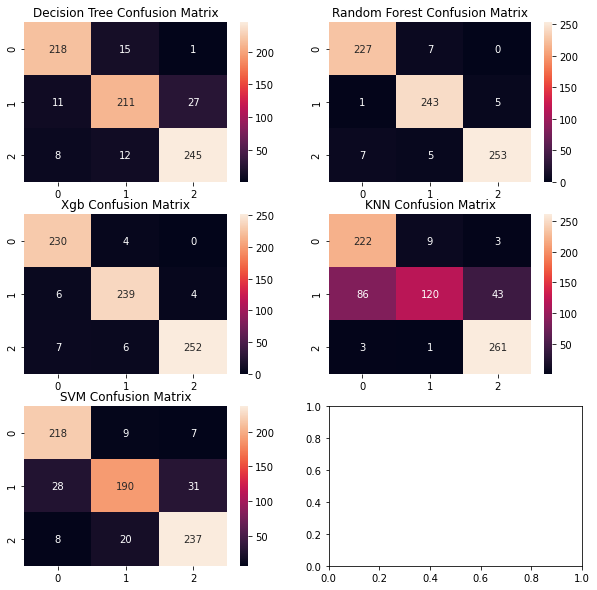

In [13]:
ml_algorthims(X,y)

# Random Forest Classifier gave an accuracy of 97%
# XGBoost Classifier gave an accuracy of 96%